In [1]:
from css_utility import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from motif_utils import kmer2seq

/home/lee/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
def get_matWcss(mat_path,dev_path):
    

In [86]:
atten_compNg= np.load("../database/ft_result/pred/4_compNg/atten.npy")

<Axes: >

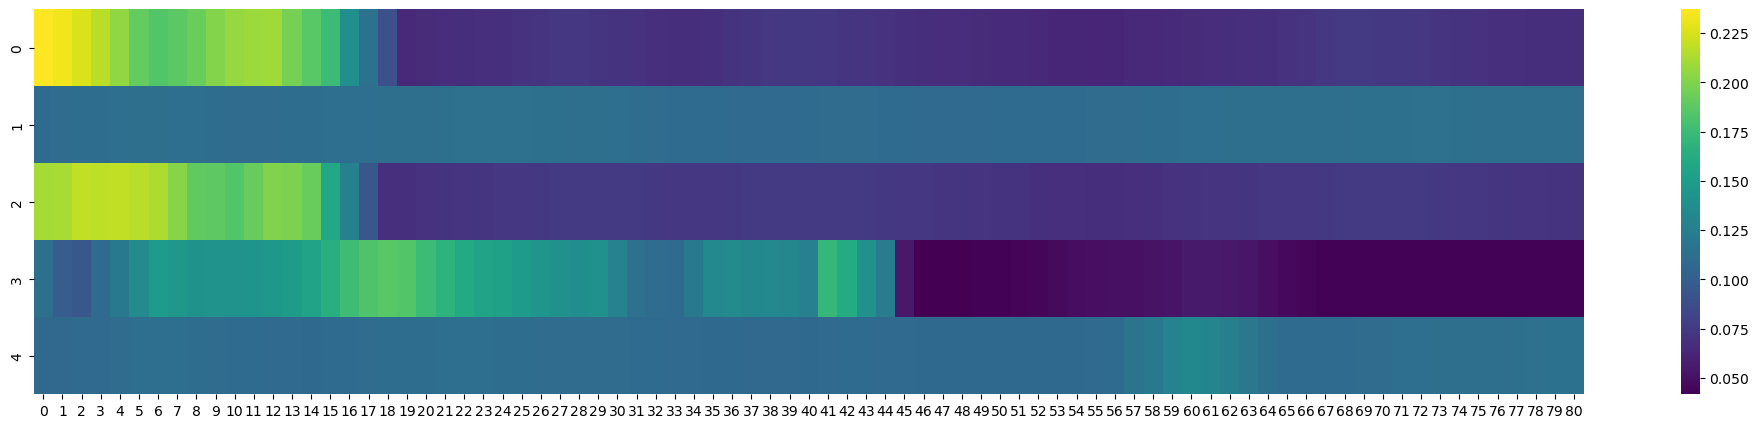

In [88]:
figure=plt.figure(figsize=(25,5))
sns.heatmap(data=atten_compless[:5], cmap="viridis")

In [89]:
raw_dev_compNg=pd.read_csv("../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv",sep="\t")

In [92]:
compNg_kmers=raw_dev_compNg["sequence"].to_list()

In [102]:
for i, item in enumerate(compNg_kmers):
    if item==" ":
        print(item)
    if type(item)!=str:
        print(i, item)

377 nan


In [111]:
raw_dev_compNg.fillna(" ", inplace=True)

In [112]:
raw_dev_compNg["sequence"].isnull().sum()

0

In [117]:
len(raw_dev_compNg)

1000

In [118]:
len(dev_compNg_conv)

999

In [138]:
raw_dev_compNg.iloc[996]

sequence    AAAA AAAA AAAA AAAA AAAA AAAA AAAE AAEE AEEE E...
label                                                       1
Name: 996, dtype: object

In [152]:
def dev_conv(dev_file_path):
    dev_df=pd.read_csv(dev_file_path,sep="\t")
    dev_df.fillna(" ", inplace=True) # change the nan into empty string
    assert dev_df["sequence"].isnull().sum()==0, "check the dev file for nan values"
    
    def kmer2seq_or_space(seq):
        if seq == " ":
            return " "
        else:
            return kmer2seq(seq)
    
    dev_df["ori_seq"] = dev_df["sequence"].apply(kmer2seq_or_space)

    return dev_df

In [153]:
dev_df=dev_conv("../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv")

In [155]:
dev_df["ori_seq"]

0      GGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
1      OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
2      OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
3                                           JJJJJJKKLLLL
4      GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGNLLJJJAABGNNNN...
                             ...                        
995    OOOOOOOGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
996    AAAAAAAAAEEEGBGGEEEEEEEDDDDDDDDDDDDDDDDDDDDDDD...
997                                                 NNNG
998                          DEEEEEEEEEEEEEEEEEEEEEEEEEB
999          OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
Name: ori_seq, Length: 1000, dtype: object

In [187]:
motif_list1=["AAAAAAAABBAA","AAAAAAAAAEEE","NBAAAAABGEEE","AAAAAAAAEEEE","AAAAAAABBBGG"]

In [200]:
for i, seq in enumerate(dev_df["ori_seq"].to_list()):
    if motif_list1[0] in seq and dev_df["label"].iloc[i]==1:
        if len(seq)>81:
            seq=seq[:81]
        print(motif_list1[0], i, len(seq), seq, "\n")
        letters=seq

AAAAAAAABBAA 222 81 AAAAAAAAAAAAAAACCAAAAAAAAAAAAABBAABBBBBBBBBBBBGGGGGGGGGGGGGEEEEEEGGGGGGGGGGEEEEEG 

AAAAAAAABBAA 582 81 AAAAAAAAAAAAAAACCAAAAAAAAAAAAABBAABBBBBBBBBBBBGGGGGGGGGGGGGEEEEEEGGGGGGGGGGEEEEEG 



In [315]:
def motif_vis(file_name, dev_path, atten_path, motif_str, motif_inst):
    """
    input examples) 
     (1) dev_path = "../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv"
     (2) atten_path = "../database/ft_result/pred/4_compNg/atten.npy"
    output: attention matrix segment which shows the motif on it
    """
    dev_df=dev_conv(dev_path)
    atten_mat=np.load(atten_path)
    for i, seq in enumerate(dev_df["ori_seq"].to_list()):
        if motif_inst in seq and dev_df["label"].iloc[i]==1:
            if len(seq)>81:
                seq=seq[:81]  # cut for visualization purpose
            print(motif_str, i, len(seq), seq, "\n")
            
            letters=seq
            
            figure=plt.figure(figsize=(35,2))
            ax =sns.heatmap(data=atten_mat[i:i+1], cmap="viridis")
            sequence = motif_str
            sequence_indices = [i for i in range(len(letters)) if letters.startswith(sequence, i)]
            for j, letter in enumerate(letters):
                
                if j in sequence_indices or j-1 in sequence_indices or j-2 in sequence_indices or j-3 in sequence_indices or j-4 in sequence_indices:
                    if atten_mat[i][j]>np.mean(atten_mat[i]) and atten_mat[i][j]>10*min(atten_mat[i]): # same condition for motif finding
                        ax.text(j + 0.5, -0.2, letter, ha='center', va='center', color=state_col_dict[letter], weight='bold', fontsize=30)
                else:
                    ax.text(j + 0.5, -0.2, letter, ha='center', va='center',fontsize=16)
           
            plt.tight_layout()
            output_path="../database/figs/motif_vis_"+file_name+"_"+motif_str+"_in_"+motif_inst+".pdf"
            plt.savefig(output_path, format='pdf')
            
            plt.show()

AAAAB 836 80 AAABBGEEEEEEEEEEEGNNNNNNNNNNNNNNNNNNNNNNNLLLLLLLLMNNNNNNNNNNNNNNNNNBAAAAABGEEEEE 



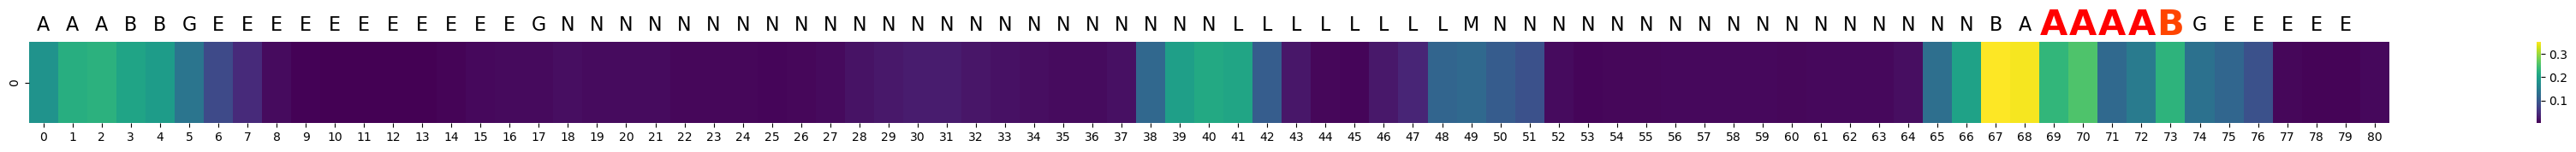

In [316]:
file_name="compNg"
dev_path="../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv"
atten_path = "../database/ft_result/pred/4_compNg/atten.npy"
motif_str="AAAAB"
# motif_inst="AAAAAAAABBAA"
# motif_inst="AAAAAAAAAEEE"
motif_inst="NBAAAAABGEEE"
# motif_inst="AAAAAAAAEEEE"
# motif_inst="AAAAAAABBBGG"
motif_vis(file_name, dev_path, atten_path, motif_str, motif_inst)

EEDDD 19 81 NNJJKABGEEDDDEEEEEEEEEEEEGGGGGGGGEEEEEEEEEEEEEEEEEEEEEEEGGGGGGGGGGEEEEEEEEEEEEEEE 



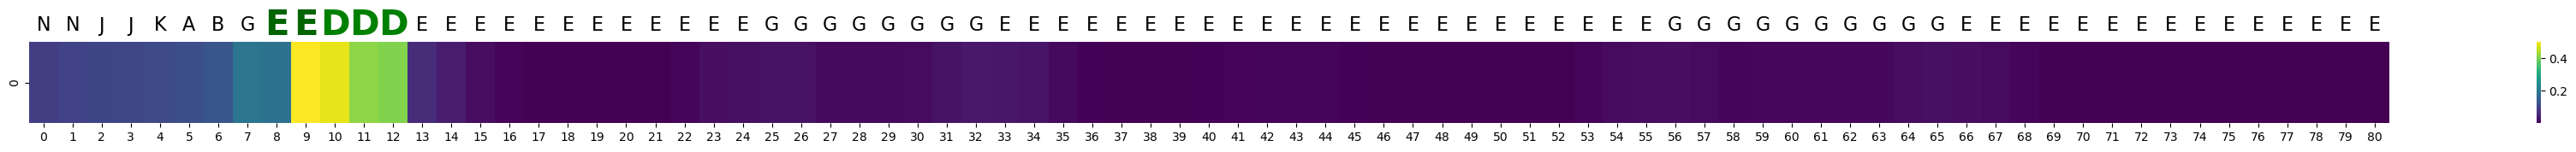

EEDDD 47 81 AAAAAAAAAAAAABBBCFFFEEGEEEEDDDDDDDDDDDDDEEEEEEEEEEEEEEDEEEEEEDDDDDDDDEEDDDEEEEEEE 



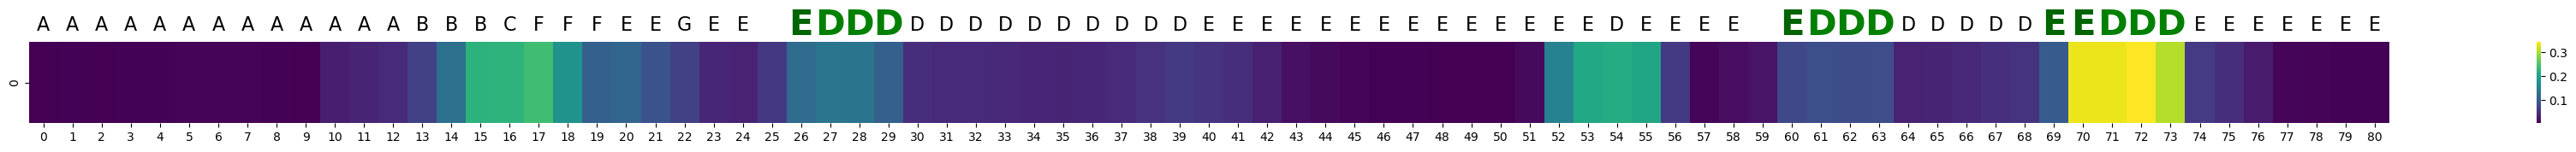

In [317]:
motif_str="EEDDD"
motif_inst="DDDEEDDDEEEE"
motif_vis(file_name,dev_path, atten_path, motif_str, motif_inst)

EEDDD 319 81 AAAAAAAAAEEEDDDDEEEEEEEGGEEEEDDDDDDEEEEEEEEEEEEEEEDDDDDDDDDDDDDDDEEEEEEEEEEEEEEEE 



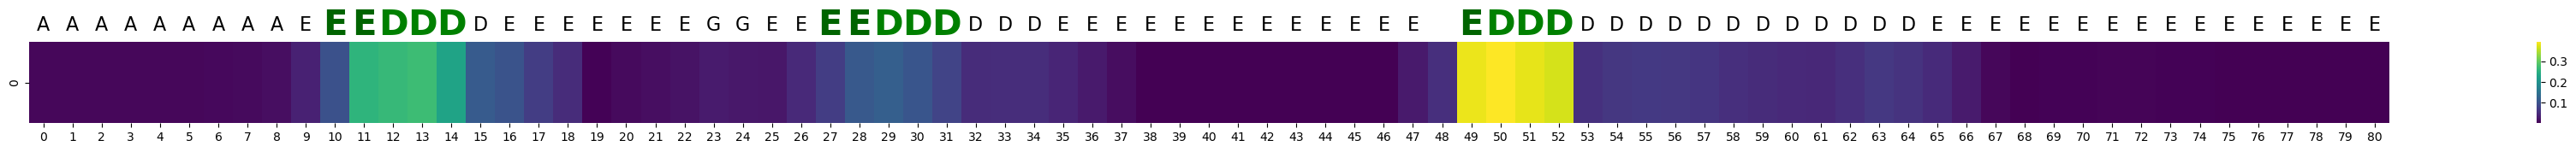

EEDDD 921 81 AAAAAAAAAEEEDDDDEEEEEEEGGEEEEDDDDDDEEEEEEEEEEEEEEEDDDDDDDDDDDDDDDEEEEEEEEEEEEEEEE 



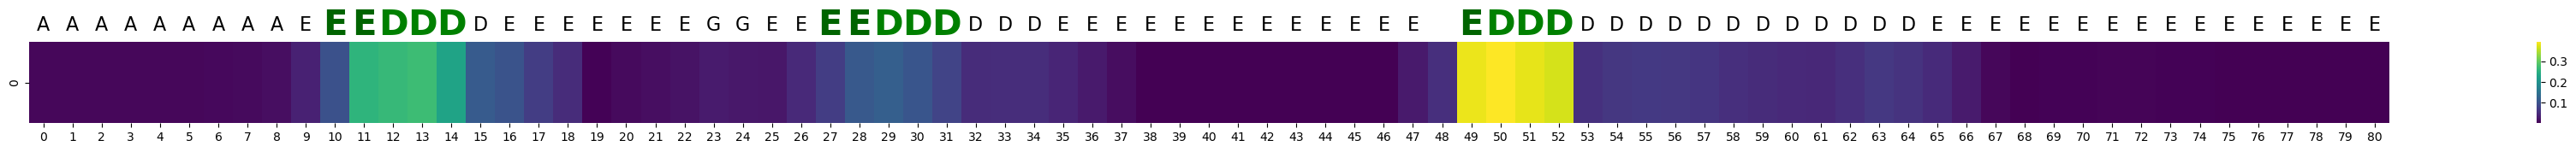

In [318]:
motif_str="EEDDD"
motif_inst="AAEEEDDDDEEE"
motif_vis(file_name,dev_path, atten_path, motif_str, motif_inst)

In [22]:
dev_dna=pd.read_csv("../database/dnabert/examples/sample_data/ft/6/dev.tsv", sep="\t")
dev_dna

,sequence,label
0,GTGGGG TGGGGA GGGGAG GGGAGG GGAGGG GAGGGA AGGG...,0
1,GTGTGG TGTGGG GTGGGA TGGGAT GGGATC GGATCA GATC...,0
2,CCCTGC CCTGCA CTGCAT TGCATG GCATGC CATGCC ATGC...,0
3,TTGGAG TGGAGC GGAGCA GAGCAA AGCAAG GCAAGG CAAG...,0
4,AGCACA GCACAG CACAGG ACAGGG CAGGGC AGGGCA GGGC...,0
...,...,...
995,GGGCTG GGCTGC GCTGCA CTGCAG TGCAGG GCAGGC CAGG...,1
996,CTGACC TGACCC GACCCT ACCCTA CCCTAG CCTAGC CTAG...,0
997,ACTTAC CTTACT TTACTG TACTGT ACTGTA CTGTAC TGTA...,1
998,CTGAGC TGAGCC GAGCCT AGCCTG GCCTGG CCTGGC CTGG...,0


In [23]:
[kmer2seq(elm) for elm in dev_dna["sequence"]]

['GTGGGGAGGGAGGCCGCCCCACTGCAGGTGGGCCTGTAGCAGCTGCACCTGAGGCAGGGCTGGCAGCCCCTGTGGGGAGGGAGGCCGCCCCACTGCAGGTG',
 'GTGTGGGATCATGTATCAGTGCAGCCTTGACCTCCTGGGCTCAAGCATTCTTCCCACCTCAACCTCTTGAGTAGCTGAAATTACAGGAACATGCCACCACA',
 'CCCTGCATGCCACATAGCAAGGTGCTGGGTCACTGATGCTAACATCTAAACAGGGGCCAGGTGCGGTGGCTCACTCTTGAAATCCCAGCACTTTGGGAGGC',
 'TTGGAGCAAGGCTATGCACCATACATGCTCTGAGTGGGCTTGATTCCTCCAGGGAAGAGGCCAGGAAAGCATTGATGTGAAAACAGCCTTTCCCTTGCCAT',
 'AGCACAGGGCACTGGTGGAGGGAGCCCTGCGGGGCAGTCCTCAAGGCCTCCGGATGGGTGTGAGAGGCACCGGGGCTGAAGCAGCATCTGGGTTTGAGGAA',
 'AGGCCAGCTGGGGTCAAGGCAAGGGGGCTGCCCAGCACAGTGGTTCTGCTCCAGAGGTGCAGTCAGACTGCCTGGGTTGGCTCATGCCTGGGTCTGTCATT',
 'GTGCGAGATGACGCACTTCCTGCCTGAGGCGGCCGCTGTTCTCGCGGCTTCCGGCAGGTGGCGCTGAGACCACGGGAAGCCAGCCTGGCTGTCGGTTAGCC',
 'GTTCTTGGATCACACTCGAGGAAAGCTCCAGCTGGGCCCAGATTTGGGGCTTCTGTCCTGAAAGGCGCTGGCTCCTGGTGTGAATGGGAGGCCCAGGGCTG',
 'GGCCAGGGGACCAGGCTGGGAGAGCTGCCAACCGCACCTGTGAAGGAATGGTCAGGAACCCTCCCACCCTGGGATGCATTCCTGGCTTTTACCAGTTATTC',
 'ATCCCAGCACTTTGGGAGGCCGAGGTGGGTGGATCATCTGAGGT

In [25]:
[len(kmer2seq(elm)) for elm in dev_dna["sequence"]]

[101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101

In [26]:
train_dna=pd.read_csv("../database/dnabert/examples/sample_data/ft/6/train.tsv", sep="\t")
train_dna

,sequence,label
0,CACAGC ACAGCC CAGCCA AGCCAG GCCAGC CCAGCC CAGC...,0
1,CTAATC TAATCT AATCTA ATCTAG TCTAGT CTAGTA TAGT...,1
2,GGAAGA GAAGAG AAGAGG AGAGGG GAGGGA AGGGAA GGGA...,1
3,CGAAAG GAAAGC AAAGCA AAGCAA AGCAAT GCAATC CAAT...,1
4,TGACTC GACTCC ACTCCC CTCCCA TCCCAA CCCAAA CCAA...,1
...,...,...
32361,AGGCTG GGCTGA GCTGAG CTGAGG TGAGGC GAGGCA AGGC...,0
32362,ACTGGG CTGGGG TGGGGA GGGGAA GGGAAC GGAACG GAAC...,1
32363,ACCCTG CCCTGA CCTGAA CTGAAG TGAAGA GAAGAA AAGA...,1
32364,TTGGCC TGGCCT GGCCTG GCCTGA CCTGAC CTGACC TGAC...,1


In [27]:
[kmer2seq(elm) for elm in train_dna["sequence"]]

['CACAGCCAGCCACTAGGCCCTGTCCTGCAGCCCCCTGTAGGGGTCTGGAACAGCCAGGAGTGGTTTAAGAGGCAGGGGAGTCGCCTTGCCCTGTGCCACAC',
 'CTAATCTAGTAATGCCGCGTTGGTGGAAAGACATGACATACCTCAAACAGCAGGGGGCGCCATGCGCCAAGCCCGCAGAGGGTTGTCCAACTCCTATTCCT',
 'GGAAGAGGGAAGGAAATGCCCCGGGTCCCAGGCGGGGCCTCGAGCGTGCCCACGCCGCCCCCTGCTGGCCACGCCTGGAGTTGCAGGAACCGGGCGCCGGG',
 'CGAAAGCAATCAGTGGCCTGGACCATGTGTAGTATAGAGAGCAACAGCGCCATCTATGCTTAATTTGGCAACATTACATGTAGTCCCGGAAAATCTTTTAA',
 'TGACTCCCAAACCAACAAAAGGGGAGGGAGTTCATCACCACTAGACTTTCCTTATAAAAAACACTAGAGGGAGTGCTTAAGCAGAAAGAAAAAAATACTAA',
 'AAGCATGAAATGAAAGACTGGGCTAGGCACAGTGGCTCACACCTGTAATCCCAGCACTTTGGGAGGCCAAGACAGGCAGATGACCTGAGGTCAGGAGTTTG',
 'GGCTTTGTTTTCTGTGAGTTACGGGGCTGCCACCTGCAGGTAAAATCTGGACATTGCCCTGAAATTGACCGAACCTTGGATACAAACCCGGCCTGACAGTG',
 'TCACCGTTACTGCCTCCTAGTGGCGGATACGGCGGCAATAGTGGCGCACATTCAAGGCAGGAAGCAAGAGGAACAGAGCCACCAGCAGGTTTGGCCCAGTG',
 'AGAAAACAAAAGCTCCGGAGTAGGAAAGTGACACAGCGCCACCTCCCGGTAGCCTGGCCGGCCAAGGCCTCTGGCTTAAGCGGGCCTCTGGCCTGCCAAAA',
 'AAGTAGAGGCCTCCTGCTTCAGGGAAGTAGAGCCGGTGTCTCGC

In [73]:
dev_compless=pd.read_csv("../database/fine_tune/CompG_and_lessCompG/4mer/dev.tsv", sep="\t")
dev_compless

,sequence,label
0,DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD D...,1
1,OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO O...,0
2,AAAA AAAA AAAA AAAA AAAA AAAA AAAE AAEE AEEE E...,1
3,EEED EEDD EDDD DDDD DDDD DDDD DDDD DDDD DDDD D...,1
4,OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO O...,0
...,...,...
995,AAAA AAAA AAAA AAAA AAAE AAEE AEEE EEEE EEEE E...,1
996,GGGG GGGG GGGG GGGG GGGG GGGG GGGG GGGG GGGG G...,1
997,JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ J...,0
998,AAAA AAAA AAAA,1


In [74]:
dev_compless_ori=dev_compless

In [75]:
seq_ori=[kmer2seq(elm) for elm in dev_compless_ori["sequence"]]

In [76]:
dev_compless_ori["sequence"]=seq_ori

In [77]:
dev_compless_ori

,sequence,label
0,DDDDDDDDDDDDDDDFBB,1
1,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,0
2,AAAAAAAAAEEEEEEEG,1
3,EEEDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDEEEEEEEEEGBB,1
4,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,0
...,...,...
995,AAAAAAAEEEEEEEEEEEEEDDDEEEEEEE,1
996,GGGGGGGGGGGGEEEEEEEEEGGGGOONNNNNIIIIIOOOOOOOOO...,1
997,JJJJJJJJJJJJJJMMMNNNNNNNNNNGGEEEEEEEEEGGGG,0
998,AAAAAA,1


In [78]:
[kmer2seq(elm) for elm in dev_compless["sequence"]]

['DDDDDDDDDDDDDDDFBB',
 'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOIIIIIIIOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOIIIIIIIIIIIIIIIOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO',
 'AAAAAAAAAEEEEEEEG',
 'EEEDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDEEEEEEEEEGBB',
 'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOIIIIIIIIIIIIIIIIOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOIIIIIIOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

(array([401., 135.,  80.,  41.,  41.,  39.,  35.,  14.,  19., 195.]),
 array([  4. ,  54.6, 105.2, 155.8, 206.4, 257. , 307.6, 358.2, 408.8,
        459.4, 510. ]),
 <BarContainer object of 10 artists>)

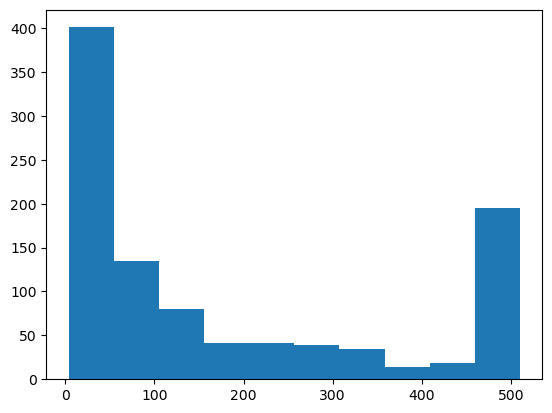

In [79]:
plt.hist([len(kmer2seq(elm)) for elm in dev_compless["sequence"]])

In [83]:
atten_compless= np.load("../database/ft_result/pred/4_compless/atten.npy")

In [84]:
atten_compNg= np.load("../database/ft_result/pred/4_compNg/atten.npy")

In [82]:
atten_gng= np.load("../database/ft_result/pred/4_GnG/atten.npy")

In [80]:
max([len(kmer2seq(elm)) for elm in dev_compless["sequence"]])

510

<Axes: >

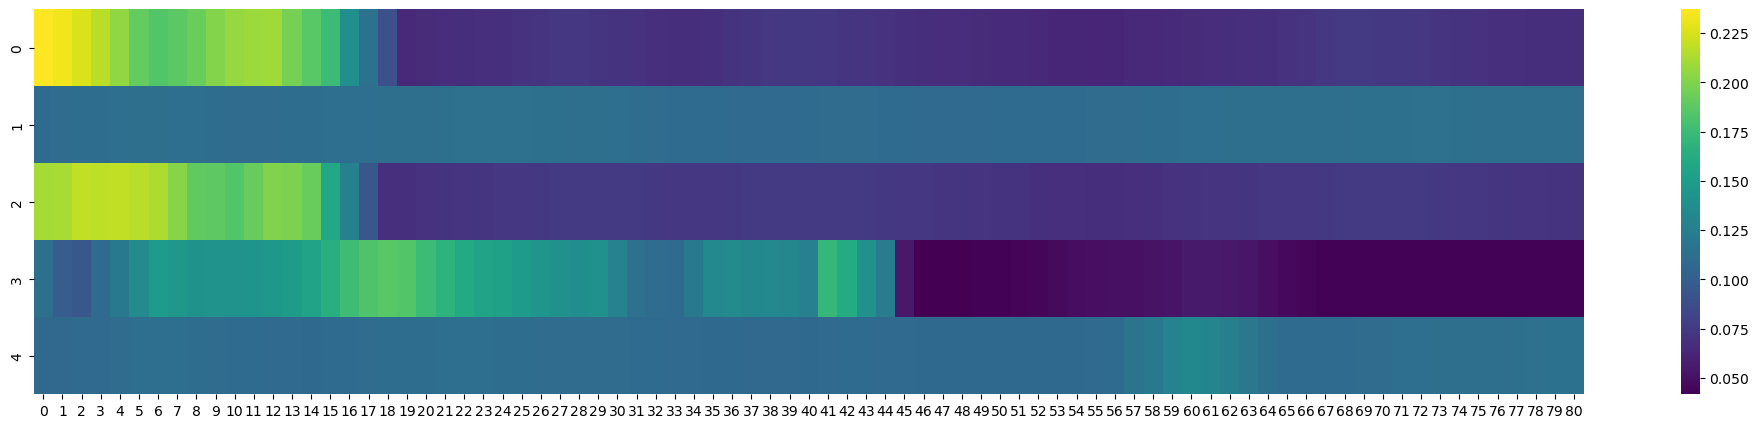

In [85]:
figure=plt.figure(figsize=(25,5))
sns.heatmap(data=atten_compless[:5], cmap="viridis")

In [320]:
atten_gng.shape

(1000, 81)

In [321]:
atten_compless.shape

(1000, 81)

In [322]:
atten_compNg.shape

(1000, 81)

<Axes: >

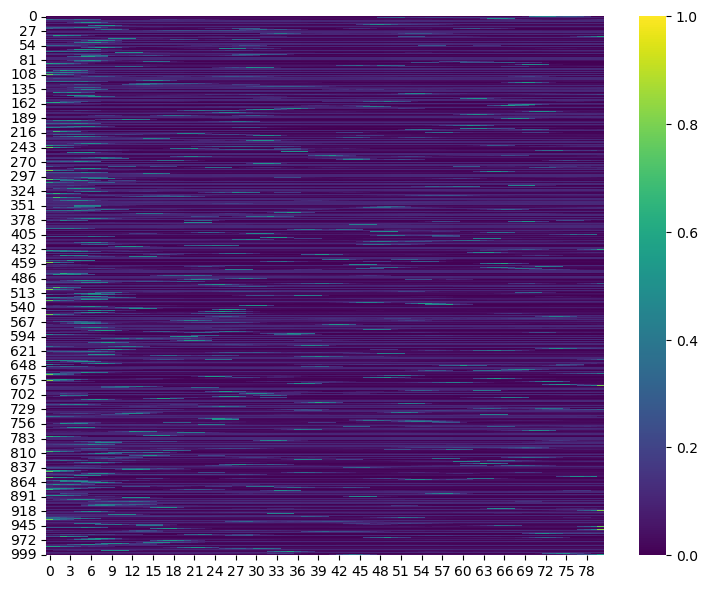

In [323]:
figure=plt.figure(figsize=(9,7))
sns.heatmap(data=atten_gng, cmap="viridis", vmin=0, vmax=1)

<AxesSubplot:>

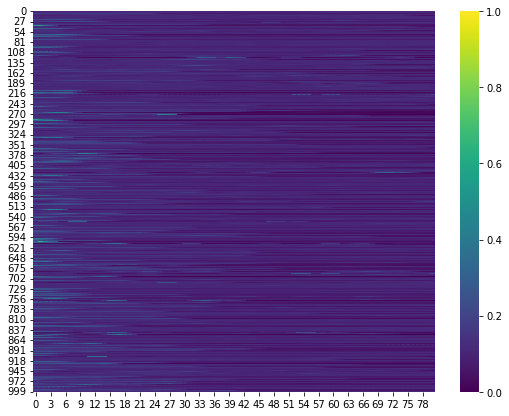

In [129]:
figure=plt.figure(figsize=(9,7))
sns.heatmap(data=atten_compless, cmap="viridis", vmin=0, vmax=1)

<AxesSubplot:>

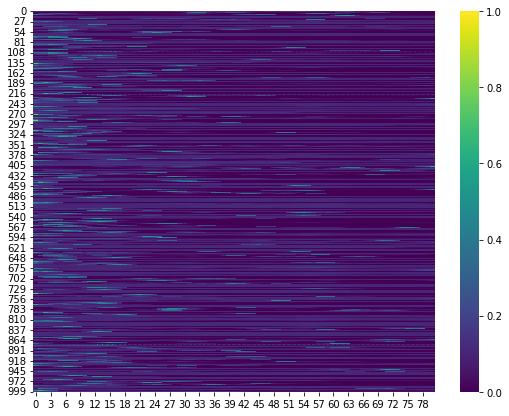

In [131]:
figure=plt.figure(figsize=(9,7))
sns.heatmap(data=atten_compNg, cmap="viridis", vmin=0, vmax=1)

In [324]:
path_gene_exp="../database/ft_result/pred/4_gene_exp/test02_double_data/"
file_lst=sorted(os.listdir(path_gene_exp))
suff="/atten.npy"
file_gene_all=sorted([path_gene_exp+file+suff for file in file_lst])
atten_gene_all=[np.load(file) for file in file_gene_all]       
len(atten_gene_all)

8

In [325]:
sorted(file_gene_all)

['../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm10_or_exp/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm10_or_not/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm20_or_exp/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm20_or_not/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm30_or_exp/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm30_or_not/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm50_or_exp/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm50_or_not/atten.npy']

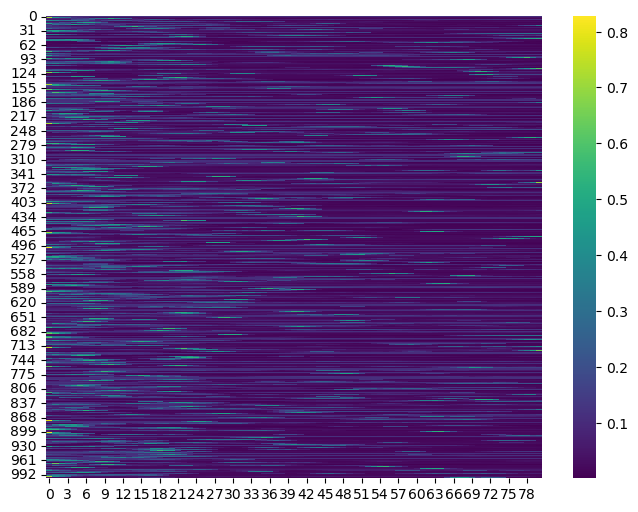

In [326]:
figure=plt.figure(figsize=(8,6))
ax=sns.heatmap(data=atten_gene_all[5], cmap="viridis")

In [331]:
file_gene_all[4]

'../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm30_or_exp/atten.npy'

In [332]:
file_gene_all[5]

'../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm30_or_not/atten.npy'

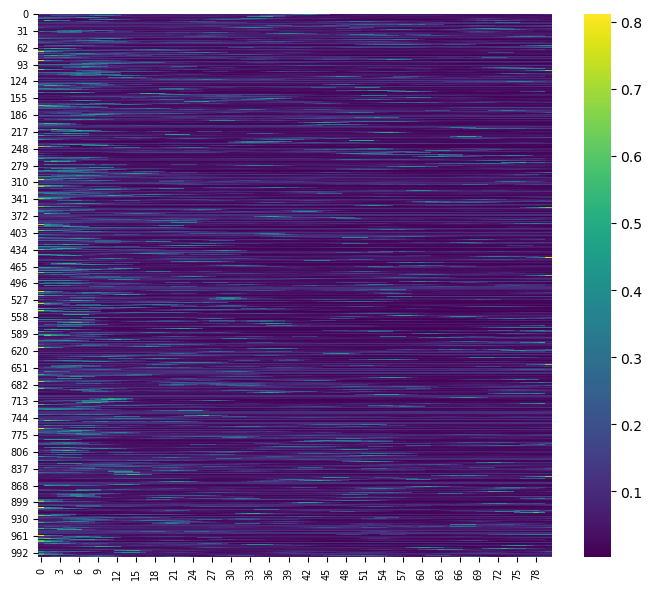

In [341]:
figure=plt.figure(figsize=(7,6))
ax=sns.heatmap(data=atten_gene_all[4], cmap="viridis")
# For x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
# For y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
# Set a tight layout
plt.tight_layout()
plt.savefig("../database/figs/attend_mat_rpkm30_or_exp.pdf",format="pdf")
plt.show()

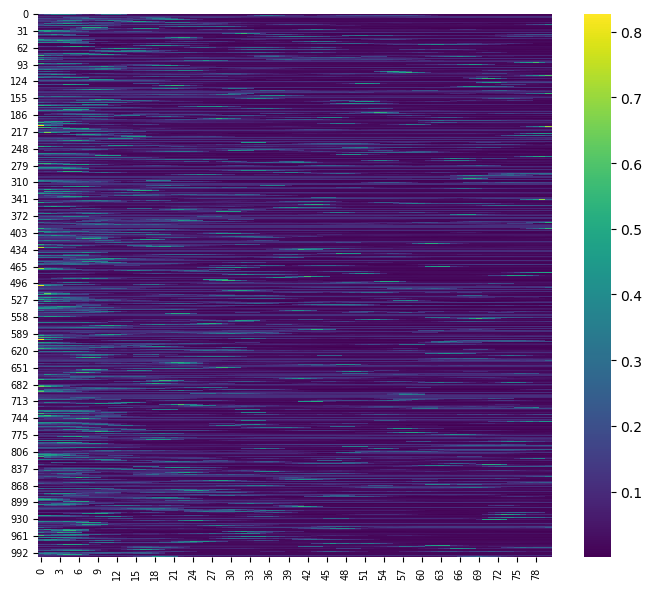

In [342]:
figure=plt.figure(figsize=(7,6))
ax=sns.heatmap(data=atten_gene_all[5], cmap="viridis")
# For x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
# For y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
# Set a tight layout
plt.tight_layout()
plt.savefig("../database/figs/attend_mat_rpkm30_or_not.pdf",format="pdf")
plt.show()

In [ ]:
figure=plt.figure(figsize=(8,6))
ax=sns.heatmap(data=atten_gene_all[5], cmap="viridis")

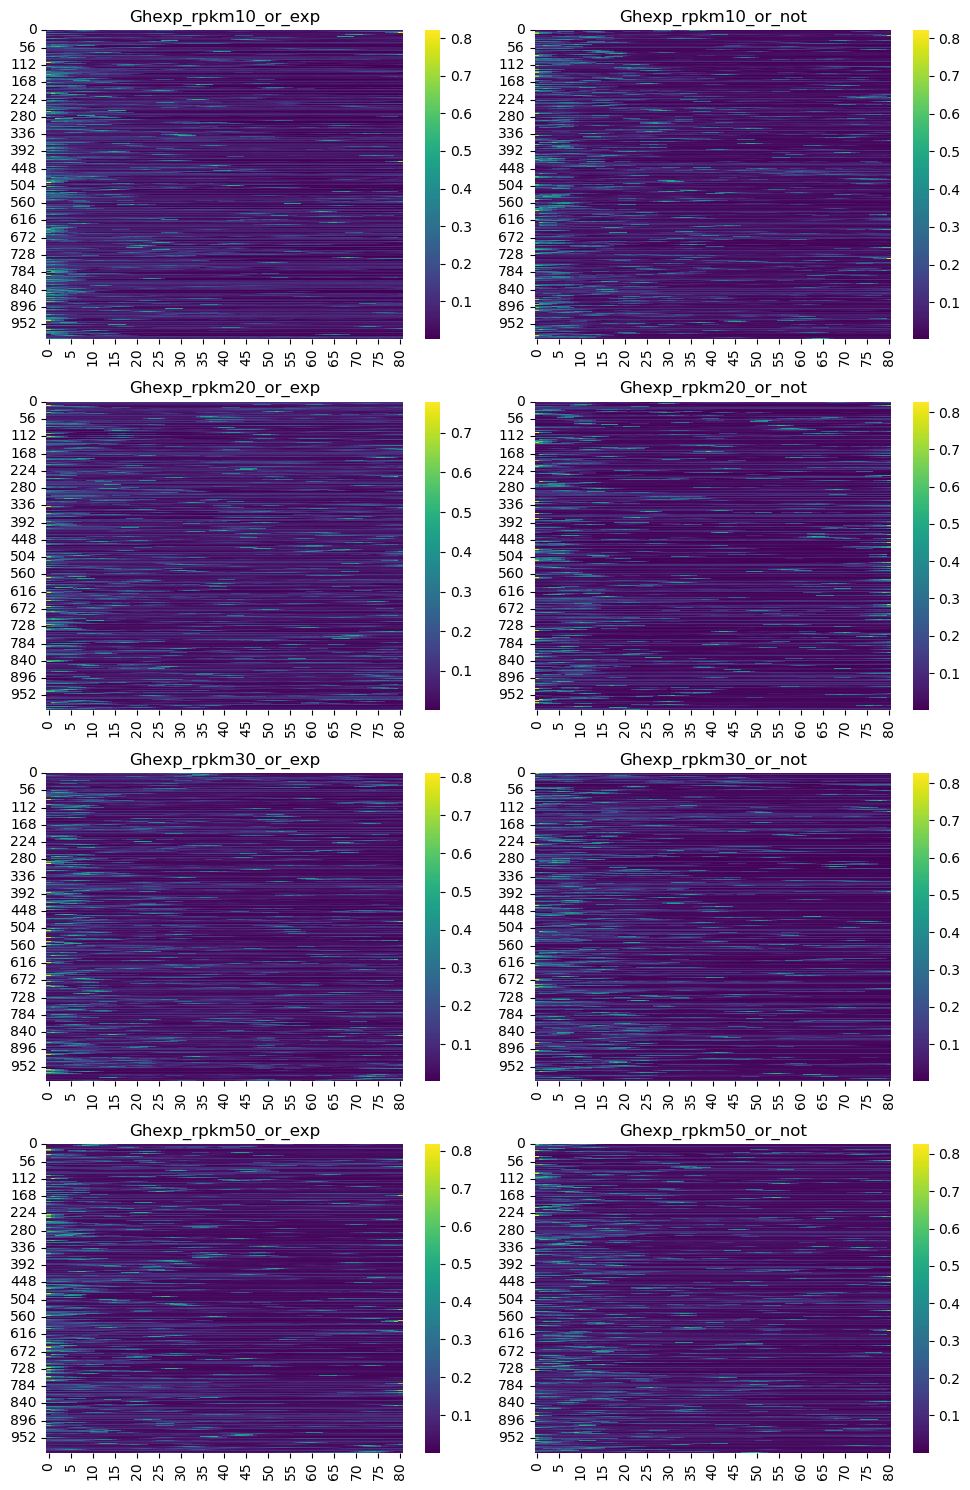

In [327]:
titles=file_lst
# Create a grid of 4x2 subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 15))
# Flatten the axes array, to easily iterate over it
axs = axs.flatten()
# For each dataframe and corresponding subplot
for df, ax, title in zip(atten_gene_all, axs, titles):
    # Draw a heatmap on the subplot
    sns.heatmap(df, ax=ax, cmap='viridis')
    ax.set_title(title)

# Set a tight layout
plt.tight_layout()

plt.savefig("../database/figs/attend_mat_gene_exp_all.pdf",format="pdf")  # file size ~ 15 MB
# plt.savefig("test_fig.svg",format="svg")  # file size~ 115 MB
# Show the plot
plt.show()

In [ ]:
titles=file_lst
# Create a grid of 4x2 subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 4))
# Flatten the axes array, to easily iterate over it
axs = axs.flatten()
# For each dataframe and corresponding subplot
atten_gene_2=
for df, ax, title in zip(atten_gene_all, axs, titles):
    # Draw a heatmap on the subplot
    sns.heatmap(df, ax=ax, cmap='viridis')
    ax.set_title(title)

# Set a tight layout
plt.tight_layout()

plt.savefig("../database/figs/attend_mat_gene_exp_all.pdf",format="pdf")  # file size ~ 15 MB
# plt.savefig("test_fig.svg",format="svg")  # file size~ 115 MB
# Show the plot
plt.show()

In [2]:
dev=pd.read_csv("../database/fine_tune/CompG_and_lessCompG/4mer/dev.tsv", sep="\t")
dev

,sequence,label
0,DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD D...,1
1,OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO O...,0
2,AAAA AAAA AAAA AAAA AAAA AAAA AAAE AAEE AEEE E...,1
3,EEED EEDD EDDD DDDD DDDD DDDD DDDD DDDD DDDD D...,1
4,OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO O...,0
...,...,...
995,AAAA AAAA AAAA AAAA AAAE AAEE AEEE EEEE EEEE E...,1
996,GGGG GGGG GGGG GGGG GGGG GGGG GGGG GGGG GGGG G...,1
997,JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ J...,0
998,AAAA AAAA AAAA,1


In [3]:
pred_4_compless_npy = np.load("../database/ft_result/pred/4_compless/pred_results.npy")

In [4]:
test_pd=dev

In [5]:
test_pd["pred"]=pred_4_compless_npy

In [6]:
test_pd

,sequence,label,pred
0,DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD D...,1,0.999400
1,OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO O...,0,0.000394
2,AAAA AAAA AAAA AAAA AAAA AAAA AAAE AAEE AEEE E...,1,0.999416
3,EEED EEDD EDDD DDDD DDDD DDDD DDDD DDDD DDDD D...,1,0.999371
4,OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO O...,0,0.000394
...,...,...,...
995,AAAA AAAA AAAA AAAA AAAE AAEE AEEE EEEE EEEE E...,1,0.999411
996,GGGG GGGG GGGG GGGG GGGG GGGG GGGG GGGG GGGG G...,1,0.999406
997,JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ J...,0,0.999412
998,AAAA AAAA AAAA,1,0.999393


In [7]:
fail_lst=[]
for i in range(len(test_pd)):
    if abs(test_pd["label"].iloc[i]-test_pd["pred"].iloc[i])>=0.2:
        print(i, test_pd["label"].iloc[i],test_pd["pred"].iloc[i])
        fail_lst.append(i)
print("--------------------")
print("total: {} out of {}".format(len(fail_lst),len(test_pd)))
print("Probability for dev.tsv: ",(len(test_pd)-len(fail_lst))/len(test_pd))

61 1 0.0003933963
116 1 0.00053799304
122 0 0.9962845
127 0 0.99920505
211 1 0.00042095644
214 1 0.7531135
264 1 0.0019817066
266 0 0.9993875
267 1 0.7681141
304 0 0.9992514
379 0 0.9993538
406 0 0.99374616
455 0 0.99895006
510 1 0.022724427
668 0 0.9994105
781 0 0.999408
796 1 0.00408655
847 1 0.66559213
927 0 0.99811196
928 0 0.9988588
930 1 0.7957156
944 0 0.9992508
997 0 0.9994122
--------------------
total: 23 out of 1000
Probability for dev.tsv:  0.977


In [4]:
def pred_prob_overall(dev_path,pred_path, file_id, color1="Blues",color2_lst=["yellowgreen","skyblue","teal","royalblue"]):
    pred=np.load(pred_path)
    dev=pd.read_csv(dev_path, sep="\t")
    dev["pred"]=pred
    dev["pred_bool"]=None
    df=dev
    
    file_output_path="../database/figs/"
    
    assert type(color2_lst) and len(color2_lst)==4, "enter a list of 4 elements, as color names"
    
    # confusion matrix #
    for i in range(len(df)):
        if df["pred"].at[i]>=0.5 :
            df["pred_bool"].at[i]=1
        else:
            df["pred_bool"].at[i]=0
    assert df["pred_bool"].isnull().any()==False, "Check the pred_bool"
    cf_matrix=confusion_matrix(df["label"],df["pred_bool"].astype(bool))

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
#     group_percentages = ["({0:.2%})".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
#     labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
#     labels = np.asarray(labels).reshape(2,2)
########## for visualize with normalization per case####################
    group_percentages = []
    for i in range(cf_matrix.shape[0]):
        for value in cf_matrix[i]:
            group_percentages.append("({0:.2%})".format(value / cf_matrix[i].sum()))

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
######################################################################
    
    # confusion matrix visualization
    sns.heatmap(cf_matrix, annot=labels, annot_kws={'size': 16}, fmt='', cmap=color1)
    
    ############### save the figure 1 ###############
    file_name1=file_output_path+file_id+'_confusion_matrix.pdf'
    plt.savefig(file_name1, format='pdf', bbox_inches='tight')
    #################################################
    print(classification_report(df["label"], df["pred_bool"].astype(bool)))
    
    high_prob, low_prob=[],[]
    label_1, label_0=[],[]
    high_1, high_0=[],[]
    low_1, low_0=[],[]

    for i in range(len(df)):
        # high_prob is defined as larger than 0.5       
        if df["pred"].iloc[i]>=0.5:
            high_prob.append(df["pred"].iloc[i])
            label_1.append(df["label"].iloc[i])
            if df["label"].iloc[i]==1:  # predition is higher than 0.5(=true), and label is 1 (=true): true positive
                high_1.append(df["pred"].iloc[i])
            else:
                high_0.append(df["pred"].iloc[i])    
        else:
            low_prob.append(df["pred"].iloc[i])
            label_0.append(df["label"].iloc[i])
            if df["label"].iloc[i]==0: # predition is lower than 0.5(=false), and label is 0 (=false): true negative
                low_0.append(df["pred"].iloc[i])
            else:
                low_1.append(df["pred"].iloc[i])

#     print("false positive: {} |  false negative: {}".format(false_positive,false_negative))
    high_pred=pd.DataFrame({'label': label_1, 'pred': high_prob})
    low_pred=pd.DataFrame({'label': label_0, 'pred': low_prob})

    fig=plt.figure(figsize=(8,8))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.subplot(2, 2, 1)
    sns.violinplot(data=high_prob, color=color2_lst[0])
    plt.title('High Probability', fontsize=13)
    plt.xticks([])
    plt.xlabel("predition >= 0.5", fontsize=13)
    plt.ylabel("Prediction", fontsize=13)

    plt.subplot(2, 2, 2)
    sns.violinplot(data=low_prob, color=color2_lst[1])
    plt.title('Low Probability', fontsize=13)
    plt.xticks([])
    plt.xlabel("predition < 0.5", fontsize=13)
    plt.ylabel("Prediction", fontsize=13)
    
    plt.subplot(2, 2, 3)
    sns.violinplot(data=high_1, color=color2_lst[2])
    plt.title('True positive', fontsize=13)
    plt.xticks([])
    plt.xlabel("For label 1", fontsize=13)
    plt.ylabel("Prediction", fontsize=13)
    
    plt.subplot(2, 2, 4)
    sns.violinplot(data=low_0, color=color2_lst[3])
    plt.title('True negative', fontsize=13)
    plt.xticks([])
    plt.xlabel("For label 0", fontsize=13)
    plt.ylabel("Prediction", fontsize=13)
    
    ############### save the figure 2 ###############
    file_name2=file_output_path+file_id+'_violinplot.pdf'
    plt.savefig(file_name2, format='pdf', bbox_inches='tight')
    #################################################

    plt.show()

    return high_pred,low_pred

In [5]:
dev_path="../database/fine_tune/genic_and_intergenic/4mer/dev.tsv"
pred_path="../database/ft_result/pred/4_GnG/pred_results.npy"

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       514
           1       0.84      0.71      0.77       486

    accuracy                           0.79      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.80      0.79      0.79      1000



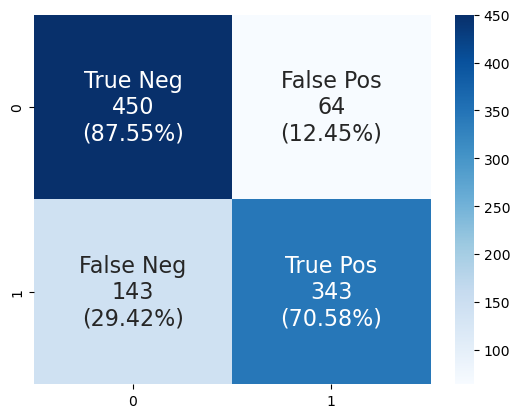

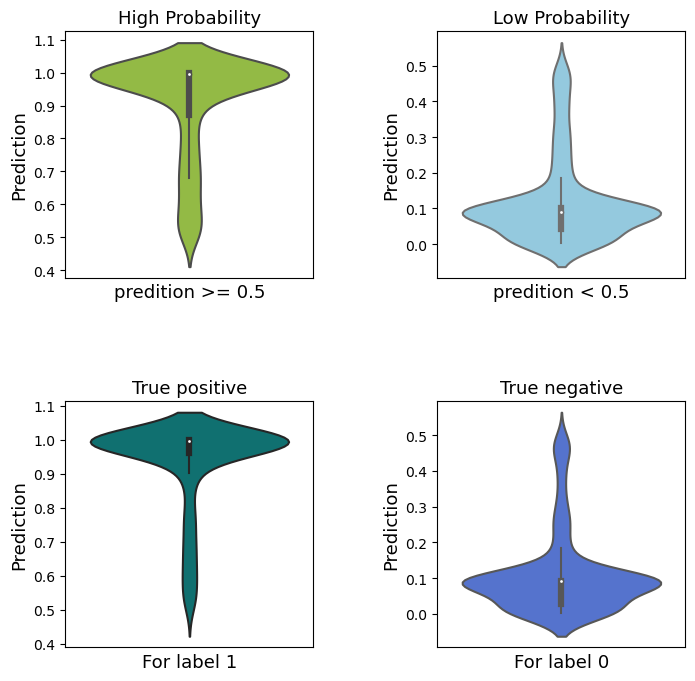

In [6]:
high_pred,low_pred=pred_prob_overall(dev_path,pred_path,file_id="GnG")

In [63]:
dev_path="../database/fine_tune/CompG_and_lessCompG/4mer/dev.tsv"
pred_path="../database/ft_result/pred/4_compless/pred_results.npy"

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       498
           1       0.97      0.99      0.98       502

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



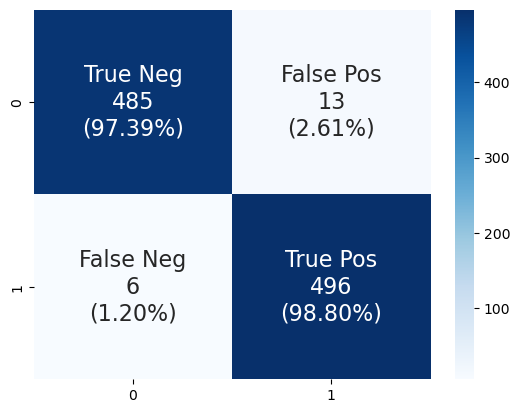

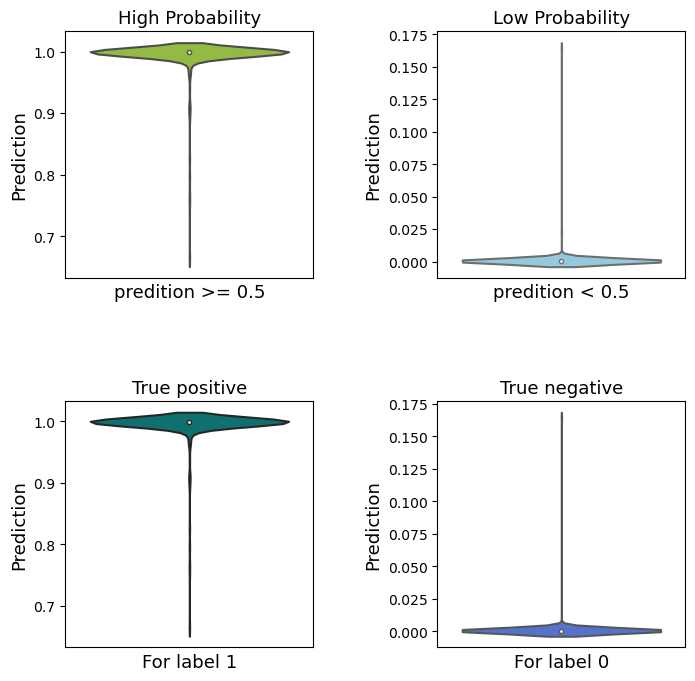

In [64]:
high_pred,low_pred=pred_prob_overall(dev_path,pred_path, file_id="comp_less")

In [71]:
dev_path2="../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv"
pred_path2="../database/ft_result/pred/4_compNg/pred_results.npy"

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       484
           1       0.93      0.97      0.95       516

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



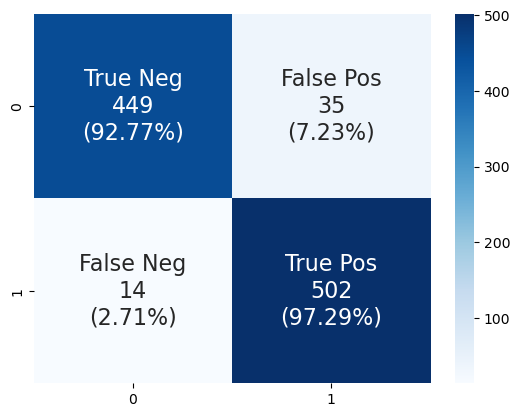

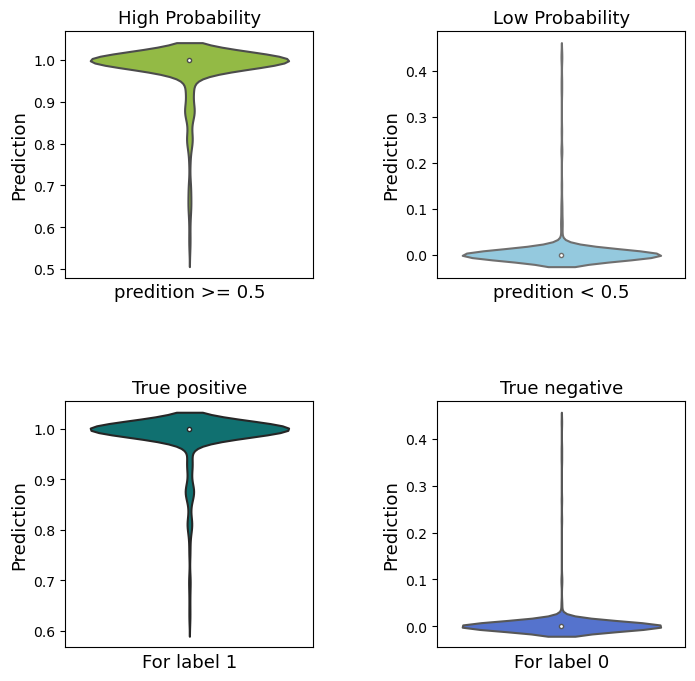

In [72]:
high_pred,low_pred=pred_prob_overall(dev_path2,pred_path2, file_id="compNg")

In [10]:
dev_path="../database/fine_tune/gene_exp/4mer/Ghexp_rpkm10_or_exp/tr_len_40k/dev.tsv"
pred_path="../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm10_or_exp/pred_results.npy"

In [11]:
pred_path.split("/")[-2]

'Ghexp_rpkm10_or_exp'

In [12]:
dev_path_pre="../database/fine_tune/gene_exp/4mer/"
dev_path_suf="/tr_len_40k/dev.tsv"
dev_path_mid_lst=sorted([item for item in os.listdir(dev_path_pre) if "rpkm" in item])

In [13]:
pred_path_pre="../database/ft_result/pred/4_gene_exp/test02_double_data/"
pred_path_suf="/pred_results.npy"
pred_path_mid_lst=sorted([item for item in os.listdir(pred_path_pre) if "rpkm" in item])

In [14]:
def vis_template_pred_prob_overall(dev_path_pre,pred_path_pre):
    dev_path_suf="/tr_len_40k/dev.tsv"
    dev_path_mid_lst=sorted([item for item in os.listdir(dev_path_pre) if "rpkm" in item])
    dev_path=[os.path.join(dev_path_pre,elm)+dev_path_suf for elm in dev_path_mid_lst]
    
    pred_path_suf="/pred_results.npy"
    pred_path_mid_lst=sorted([item for item in os.listdir(pred_path_pre) if "rpkm" in item])
    pred_path=[os.path.join(pred_path_pre,elm)+pred_path_suf for elm in pred_path_mid_lst] 
    
    assert len(dev_path)==len(pred_path), "length discrepancy: check the number of dev_path and pred_path."
    for i in range(len(dev_path)):
        dev=dev_path[i]
        pred=pred_path[i]
        assert dev.split("/")[-3]==pred.split("/")[-2], "file name discrepandy: check dev and pred file names."
        print("-------------------")
        print(dev.split("/")[-3])
        print("-------------------")
        high_pred,low_pred=pred_prob_overall(dev,pred)
    
    return None

In [15]:
vis_template_pred_prob_overall(dev_path_pre,pred_path_pre)

-------------------
Ghexp_rpkm10_or_exp
-------------------


TypeError: pred_prob_overall() missing 1 required positional argument: 'file_id'

In [ ]:
dev_path2="../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv"
pred_path2="../database/ft_result/pred/4_compNg/pred_results.npy"
high_pred,low_pred=pred_prob_overall(dev_path2,pred_path2, file_id="compNg")

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       519
           1       0.72      0.72      0.72       481

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000



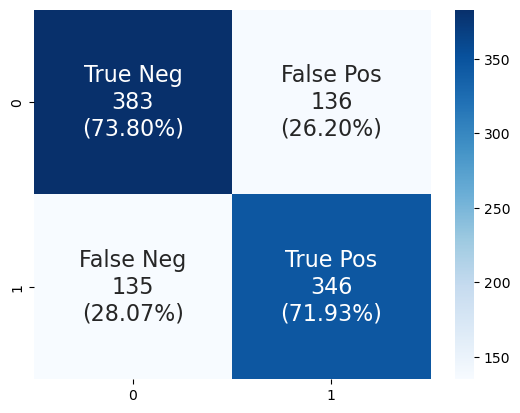

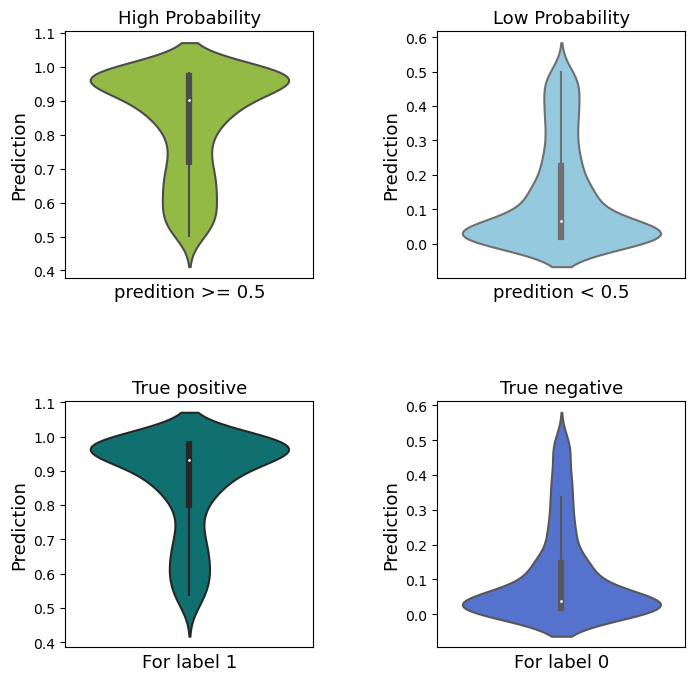

In [18]:
dev_path10="../database/fine_tune/gene_exp/4mer/Ghexp_rpkm10_or_not/tr_len_40k/dev.tsv"
pred_path10="../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm10_or_not/pred_results.npy"
high_pred10,low_pred10=pred_prob_overall(dev_path10,pred_path10, file_id="exp10_not")

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       485
           1       0.79      0.75      0.77       515

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



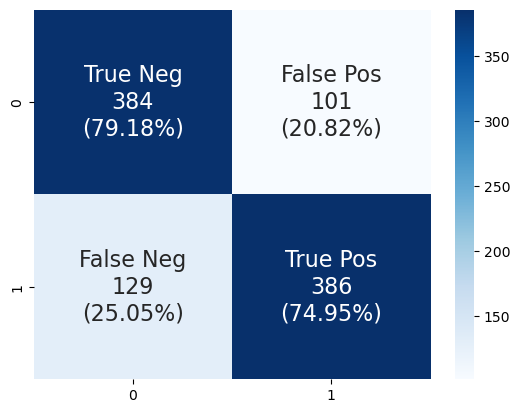

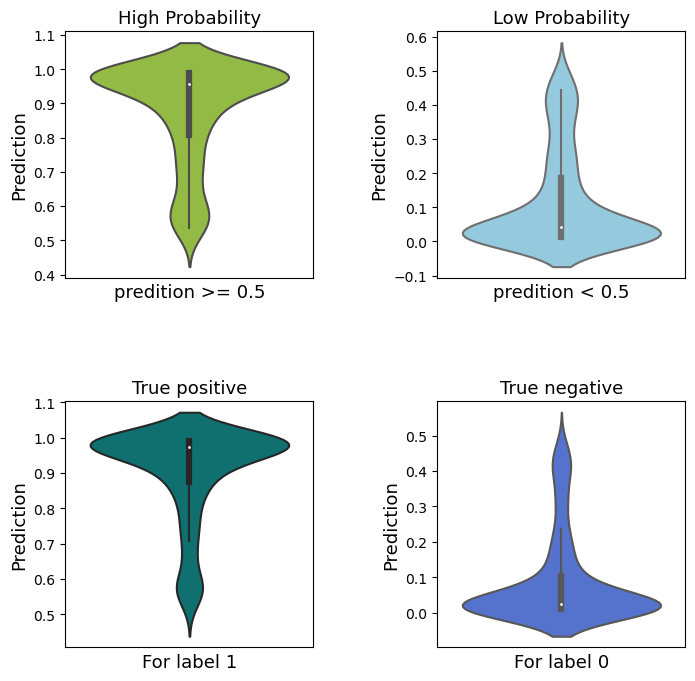

In [19]:
dev_path20="../database/fine_tune/gene_exp/4mer/Ghexp_rpkm20_or_not/tr_len_40k/dev.tsv"
pred_path20="../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm20_or_not/pred_results.npy"
high_pred20,low_pred20=pred_prob_overall(dev_path20,pred_path20, file_id="exp20_not")

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       483
           1       0.86      0.81      0.83       517

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



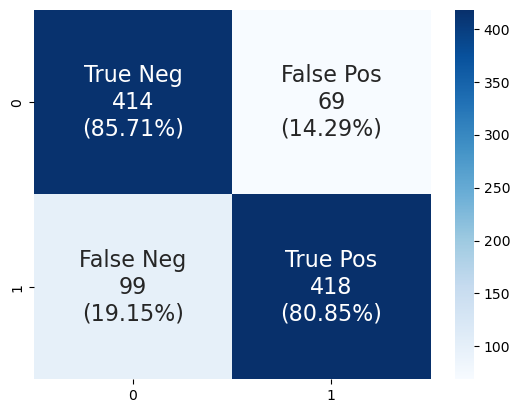

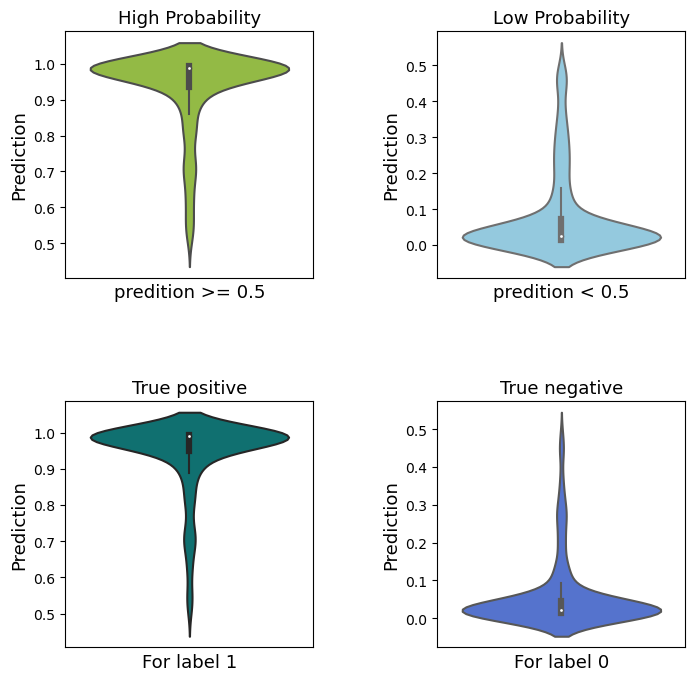

In [20]:
dev_path30="../database/fine_tune/gene_exp/4mer/Ghexp_rpkm30_or_not/tr_len_40k/dev.tsv"
pred_path30="../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm30_or_not/pred_results.npy"
high_pred30,low_pred30=pred_prob_overall(dev_path30,pred_path30, file_id="exp30_not")

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       507
           1       0.88      0.85      0.86       493

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



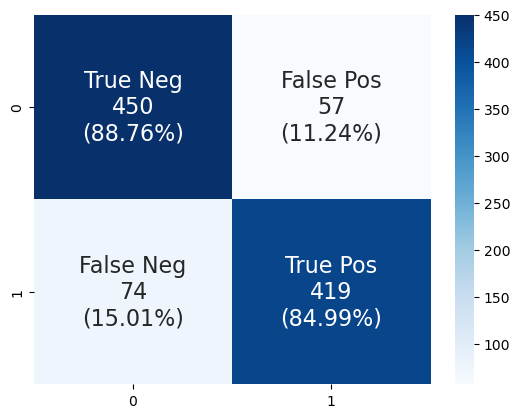

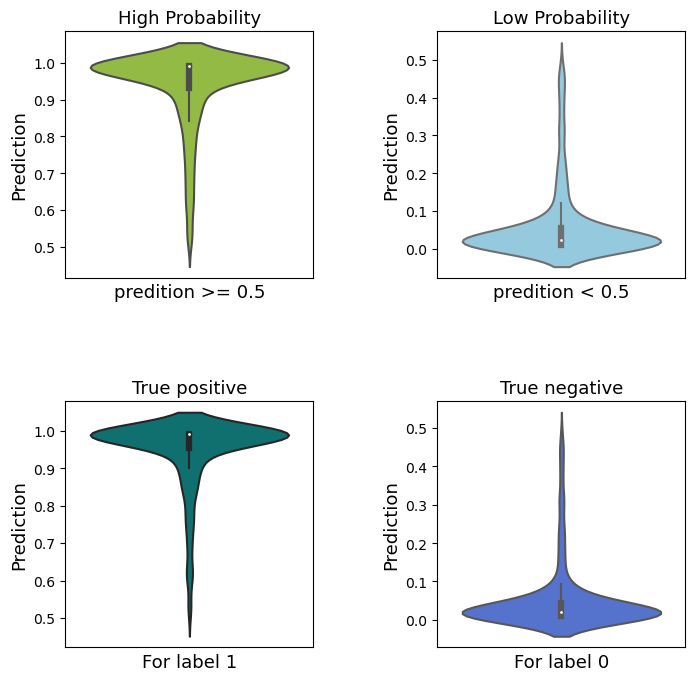

In [21]:
dev_path50="../database/fine_tune/gene_exp/4mer/Ghexp_rpkm50_or_not/tr_len_40k/dev.tsv"
pred_path50="../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm50_or_not/pred_results.npy"
high_pred50,low_pred50=pred_prob_overall(dev_path50,pred_path50, file_id="exp50_not")

In [17]:
for dev in [os.path.join(dev_path_pre,elm)+dev_path_suf for elm in dev_path_mid_lst]:
    dev_file=dev
for pred in [os.path.join(pred_path_pre,elm)+pred_path_suf for elm in pred_path_mid_lst]:
    pred_file=pred

In [23]:
dev_file.split("/")[-3]

'Ghexp_rpkm50_or_not'

In [26]:
pred_file.split("/")[-2]

'Ghexp_rpkm50_or_not'

In [7]:
high_pred,low_pred=pred_prob_overall(dev_path,pred_path)

TypeError: pred_prob_overall() missing 1 required positional argument: 'file_id'

In [20]:
high_pred

,label,pred
0,1,0.999400
1,1,0.999416
2,1,0.999371
3,1,0.999414
4,1,0.999417
...,...,...
504,1,0.999415
505,1,0.999411
506,1,0.999406
507,0,0.999412


In [18]:
pred_4_compless_npy.shape

(1000,)

(array([490.,   1.,   0.,   0.,   0.,   0.,   1.,   3.,   2., 503.]),
 array([3.8895797e-04, 1.0029192e-01, 2.0019490e-01, 3.0009785e-01,
        4.0000081e-01, 4.9990380e-01, 5.9980673e-01, 6.9970971e-01,
        7.9961270e-01, 8.9951563e-01, 9.9941862e-01], dtype=float32),
 <BarContainer object of 10 artists>)

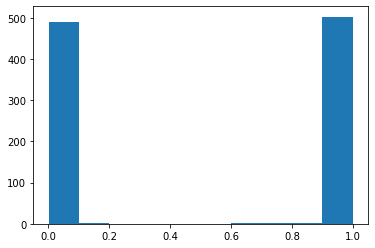

In [14]:
plt.hist(pred_4_compless_npy)

In [9]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Create an image with a white background
width = 800
height = 200
image = Image.new('RGB', (width, height), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Define a list of characters and their corresponding probabilities
alphabet = ['A', 'B', 'C', 'D']
probabilities = [0.2, 0.3, 0.1, 0.4]

# Scale the probabilities to the width of the image
scaled_probabilities = [p * width for p in probabilities]

# Define a color for each character
colors = {'A': (255, 0, 0), 'B': (0, 255, 0), 'C': (0, 0, 255), 'D': (255, 255, 0)}

# Define the font
font = ImageFont.truetype("/Library/Fonts/Arial.ttf", 300)

# Draw the characters on the image
for i in range(len(alphabet)):
    x1 = sum(scaled_probabilities[:i])
    x2 = x1 + scaled_probabilities[i]
    font_size = int(300 * probabilities[i])
    font = ImageFont.truetype("/Library/Fonts/Arial.ttf", font_size)
    draw.text((x1 + (x2-x1)/2, height/2), alphabet[i], fill=colors[alphabet[i]], font=font, align="center")

# Save the image
image.save('motif.png')
